In [2]:
key ="2201050767bb417f928e06c7166304c6b41e485d"
b_key ="641DEDB0-361B-441D-BF2E-215378D97EB4"

from census import Census
from us import states
%matplotlib inline
import seaborn as sns
import matplotlib
from plotly import plotly as py
import plotly
#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import matplotlib.pyplot as plt
import numpy as np
import requests
import pandas as pd
pd.options.mode.chained_assignment = None 
import os
import requests
import urllib.request, json 
import pybea
from scipy.stats import norm
from matplotlib.ticker import PercentFormatter
#init_notebook_mode(connected=True)


import plotly.figure_factory as ff
matplotlib.style.use('ggplot')
plotly.tools.set_credentials_file(username='gabriel1200', api_key='JN4V10kJSdeeOp8MBwdw')


In [20]:
from jupyter_core.paths import jupyter_data_dir
print(jupyter_data_dir())

C:\Users\Gabriel\AppData\Roaming\jupyter


In [27]:
outcome = pd.read_csv("county_outcomes.csv")
outcome['state'] = outcome['state'].astype(str)
outcome['state'] = outcome['state'].str.zfill(2)
outcome['county'] = outcome['county'].astype(str)
outcome['county'] = outcome['county'].str.zfill(3)
outcome['geo_id'] =  outcome['state']+outcome['county'] 
x="kfr_black_pooled_p25"
y="kfr_hisp_pooled_p25"
z="kfr_white_pooled_p25"

outcome =outcome.dropna(subset=[x,y,z])
len(outcome)
outcome[z]

0       0.407264
1       0.426993
3       0.397785
4       0.404012
6       0.425367
7       0.400153
8       0.380743
9       0.386081
10      0.416176
15      0.433941
16      0.408448
19      0.445977
21      0.419348
22      0.434042
23      0.436203
24      0.410046
25      0.427886
26      0.421621
27      0.392893
29      0.417757
30      0.416305
33      0.423392
34      0.416957
35      0.409811
36      0.422852
38      0.422195
39      0.413722
40      0.417131
41      0.394965
43      0.377764
          ...   
3065    0.475037
3067    0.529613
3073    0.480754
3074    0.460156
3075    0.419986
3077    0.472987
3081    0.482935
3082    0.493376
3083    0.458187
3086    0.436540
3087    0.471604
3090    0.488572
3091    0.500592
3093    0.549117
3095    0.488550
3097    0.445839
3099    0.423107
3101    0.514248
3102    0.458475
3105    0.475166
3110    0.462131
3112    0.491456
3113    0.491500
3116    0.450125
3117    0.496535
3118    0.489715
3124    0.514903
3128    0.4636

ValueError: weights should have the same shape as x

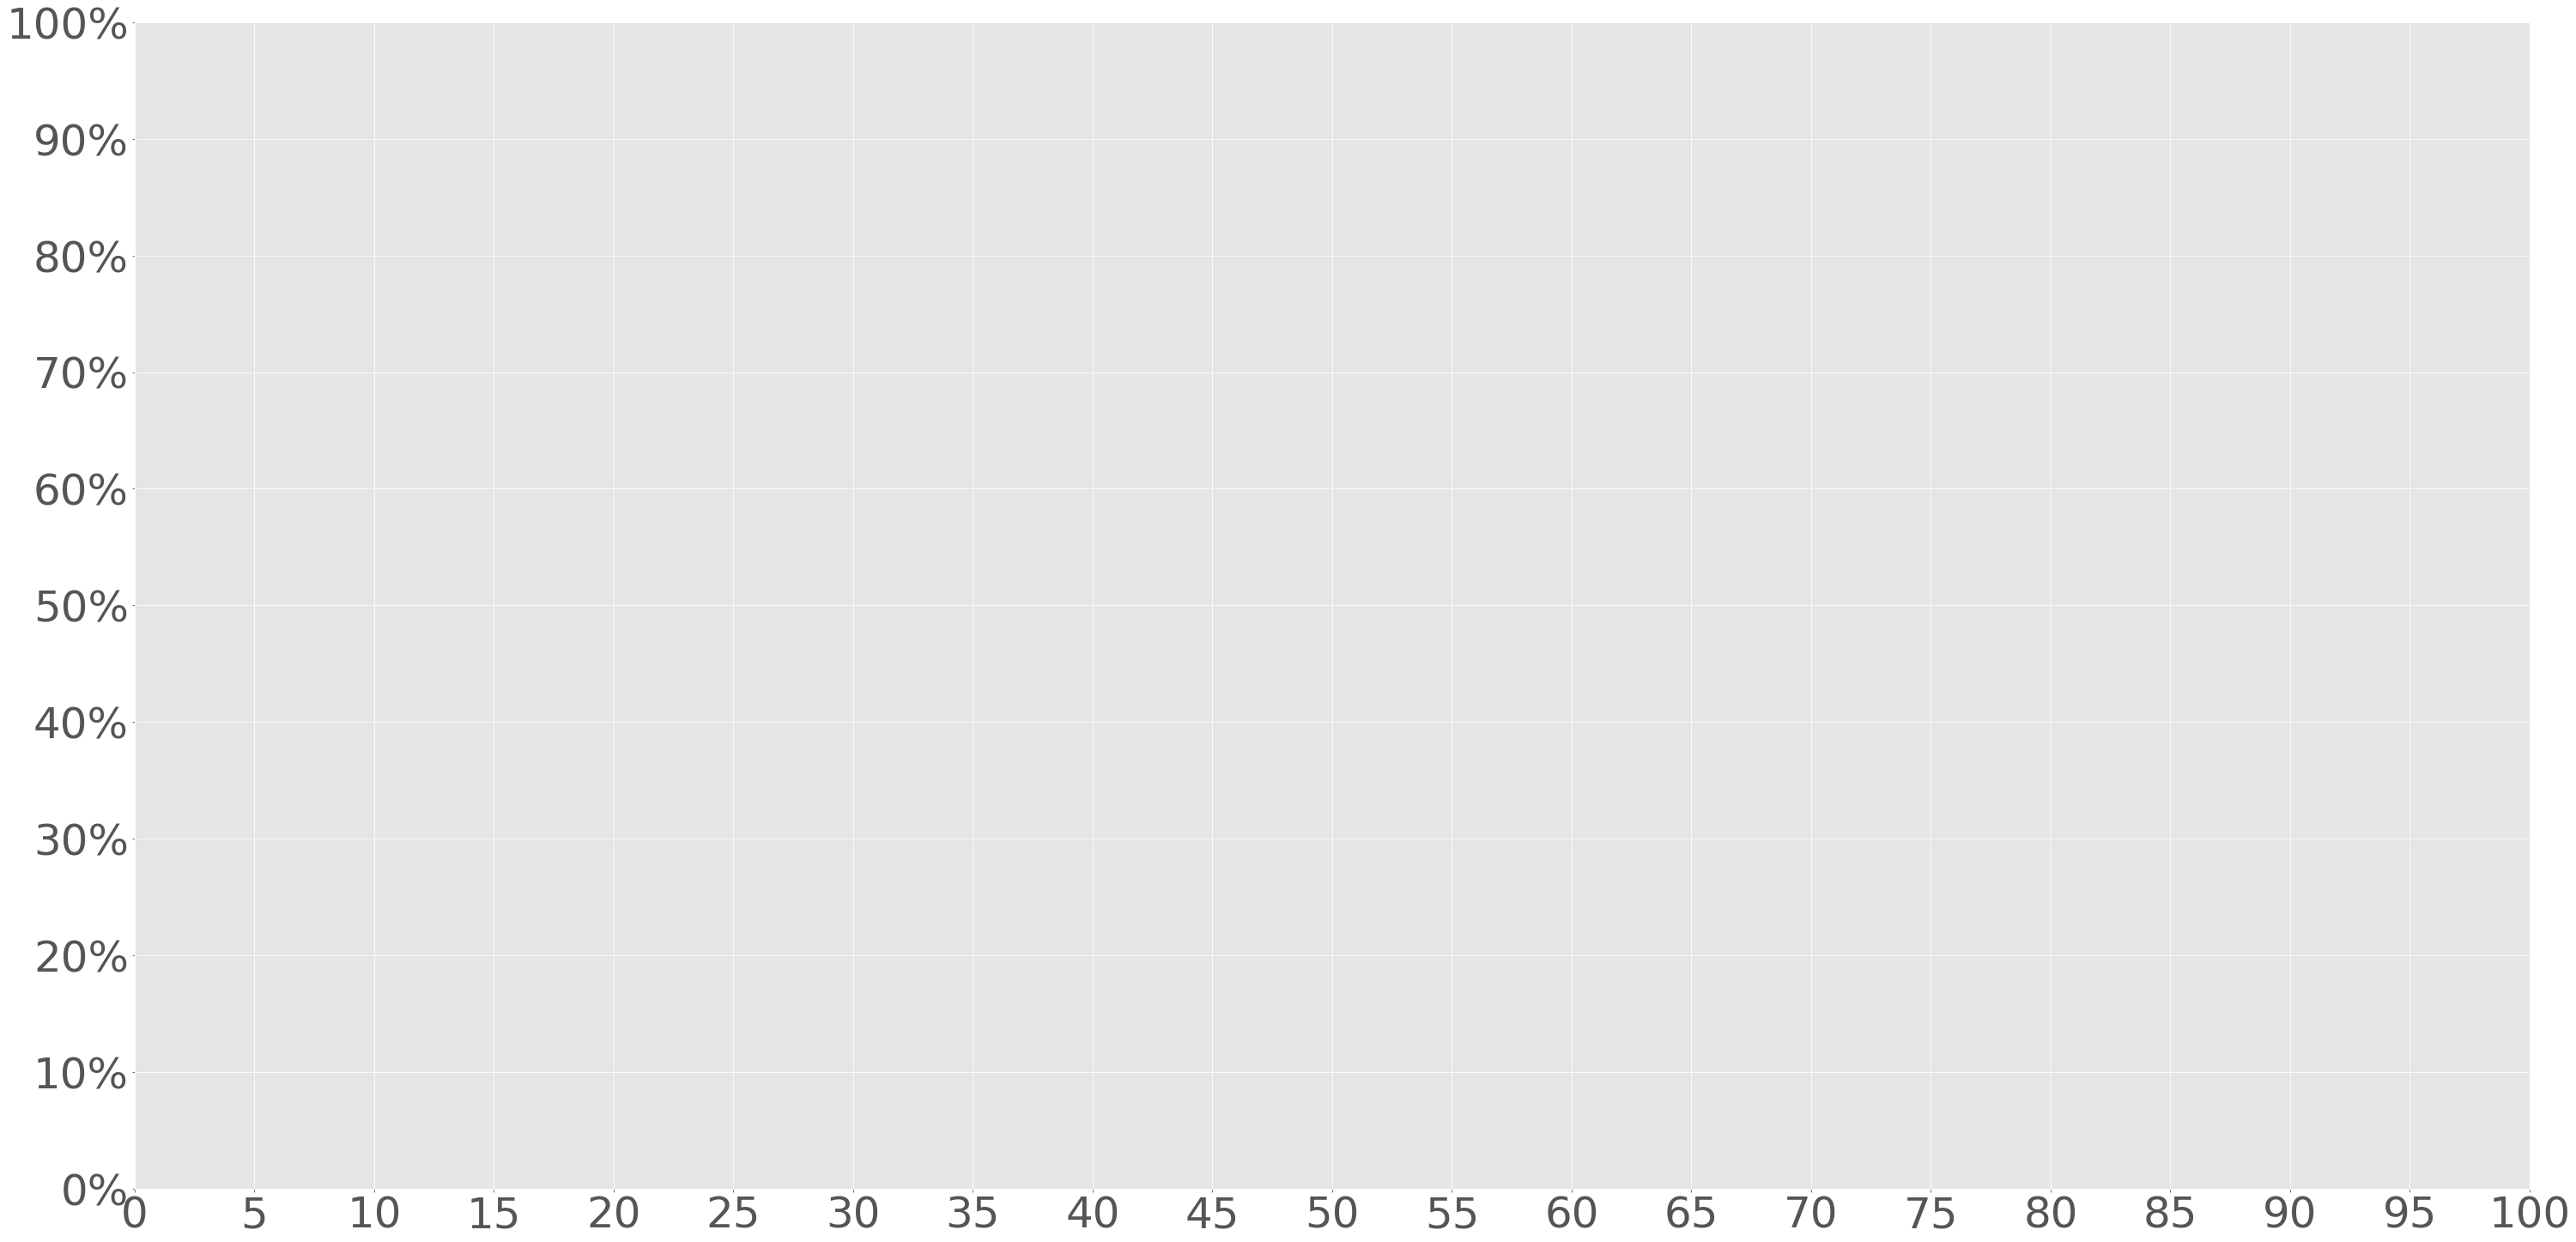

In [24]:

r_as = outcome[x]
m_as = outcome[y]
u_as = outcome[z]
fig, ax = plt.subplots(figsize=(50, 25) ,sharex = True )

mbin = [i *5 for i in range(0,21)]

plt.xticks( mbin,fontsize=30)
ax.yaxis.set_major_formatter(PercentFormatter())


plt.xticks(fontsize = 50)
plt.yticks( [i * 10 for i in range(11)],fontsize=30)

plt.yticks(fontsize = 50)
 # labels along the bottom edge are off
#sns.set(font_scale=3)
sns.distplot([r_as,m_as,u_as],hist=True,  kde= False, bins =mbin, ax=ax, color=['green',"red",'blue',] , label=['Rural','Mostly Rural',"Urban"], hist_kws={ "weights":[100 * np.ones_like(r_as)/float(len(r_as)),100 * np.ones_like(m_as)/float(len(m_as)),100 * np.ones_like(u_as)/float(len(u_as))]})
#sns.distplot(r_as,hist=True,  kde= False, bins =mbin, ax=ax, color='green', label="Rural",hist_kws={ "weights":100 * np.ones_like(r_as)/float(len(r_as)),"stacked":False})
#sns.distplot(m_as,hist=True, ax=ax,kde= False, color='r', bins= mbin,label="Mostly rural",hist_kws={"weights":100 * np.ones_like(m_as)/float(len(m_as)),"stacked":False})
#sns.distplot(u_as,hist=True,  ax=ax, kde= False, color='b', bins= mbin, label="Urban",hist_kws={"weights":100 * np.ones_like(u_as)/float(len(u_as)),"stacked":False})
ax.legend(loc=1, prop={'size': 70})


plt.xlabel('Percentage of ' +x+ ' Residents in Counties by Rurality', fontsize=80)
plt.show()

In [14]:

df_sample = outcome


colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]
endpts = list(np.linspace(10, 70, len(colorscale) - 1))
fips = df_sample['geo_id'].tolist()
values = df_sample[x].tolist()

fig = ff.create_choropleth(
    fips=fips, values=values,
    binning_endpoints=endpts,
    colorscale=colorscale,
    show_state_data=False,
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='Black 25th Percentile Income Progression',
    legend_title='Mean Household Income Rank'
)
py.iplot(fig, filename='choropleth_full_usa')

C:\Users\Gabriel\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [9]:

x="kfr_black_male_p25"
df_sample = outcome


colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]
endpts = list(np.linspace(10, 70, len(colorscale) - 1))
fips = df_sample['geo_id'].tolist()
values = df_sample[x].tolist()

fig = ff.create_choropleth(
    fips=fips, values=values,
    binning_endpoints=endpts,
    colorscale=colorscale,
    show_state_data=False,
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='Black Male 25th Percentile Income Progression',
    legend_title='Mean Household Income Rank'
)
py.iplot(fig, filename='choropleth_full_usa')

C:\Users\Gabriel\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [16]:
outcome[x].max()

0.50226533

In [17]:
outcome = outcome.sort_values(x)

In [18]:
outcome.tail()\

,state,county,cz,czname,kfr_pooled_pooled_p25,kfr_pooled_pooled_p25_se,jail_pooled_pooled_p25,jail_pooled_pooled_p25_se,pooled_pooled_count,kfr_black_pooled_p25,...,jail_hisp_male_p25_se,jail_white_male_p25,jail_white_male_p25_se,white_male_count,black_male_count,hisp_male_count,white_female_count,black_female_count,hisp_female_count,geo_id
2800,49,049,36000.0,Provo,0.489251,0.002592,0.014376,0.001175,35900.4800,0.480682,...,0.006274,0.019608,0.002039,14657.64600,86.776184,3035.432600,14054.13400,87.781082,2684.999800,49049
1628,30,063,34504.0,Missoula,0.444100,0.004960,0.019933,0.002898,8964.9746,0.482080,...,0.003914,0.028117,0.005400,3817.27660,32.230709,153.220670,3818.78000,16.640100,143.569090,30063
664,17,141,24400.0,Rockford,0.435227,0.006980,0.016796,0.003697,4340.9678,0.496266,...,0.023330,0.028590,0.007439,1851.44340,11.910755,347.759770,1717.47080,17.702074,284.471530,17141
3101,55,109,21501.0,Minneapolis,0.499340,0.007213,0.009514,0.002645,3766.7502,0.497927,...,0.052246,0.014640,0.004109,1820.70420,9.173191,23.727509,1685.56740,NaN,43.866562,55109
2759,48,475,31402.0,Pecos,0.520871,0.009960,0.025614,0.006140,2035.4208,0.502265,...,0.013416,0.074900,0.025684,298.81653,126.886090,734.359800,269.60599,NaN,601.392880,48475
